In [5]:
import numpy as np
import pandas as pd
import datetime
import sklearn as skl
import matplotlib.pyplot as plt

def to_datetime(review_df):
    return review_df.assign(datetime = pd.to_datetime(review_df['date'])).drop(labels=['date'], axis = 'columns').set_index('datetime').sort_index()


In [6]:
AZ_review = to_datetime(pd.read_csv('AZ_all_features.csv').rename(index=str, columns = {'datetime':'date'}))

In [7]:
#train/test split
from sklearn.model_selection import train_test_split
X = AZ_review[['trendiness', 'percent_reviews', 'star_growth']]
Y = AZ_review['high_growth']
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

print("Training Decision Tree...")
dtc = DecisionTreeClassifier()
dtc.fit(Xtr, Ytr)

print("Training Logistic Regression...")
lrc = LogisticRegression()
lrc.fit(Xtr, Ytr)

print("Training Bernoulli Naive Bayes...")
nbc = BernoulliNB()
nbc.fit(Xtr, Ytr)

print("Decision Tree mean accuracy: {:2.4f}".format(dtc.score(Xte,Yte)))
print("Log-Reg mean accuracy: {:2.4f}".format(lrc.score(Xte,Yte)))
print("Naïve Bayes mean accuracy: {:2.4f}".format(nbc.score(Xte,Yte)))
print('Base accuracy: {:2.4f}'.format(1-Yte.sum()/Yte.count()))

Training Decision Tree...
Training Logistic Regression...


/home/ci411/.conda/envs/py3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Bernoulli Naive Bayes...
Decision Tree mean accuracy: 0.9770
Log-Reg mean accuracy: 0.9259
Naïve Bayes mean accuracy: 0.9259
Base accuracy: 0.9259


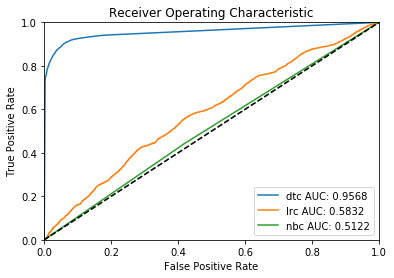

In [9]:
from sklearn.metrics import roc_curve, auc

models = [dtc, lrc, nbc]
models_l = ['dtc', 'lrc', 'nbc']

for i, model in enumerate(models):
    predict = model.predict_proba(Xte)
    fpr, tpr, thres = roc_curve(Yte, predict[:,1])
    auc = skl.metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label=(models_l[i] + ' AUC: {:2.4f}'.format(auc)))

plt.plot([[0,0],[1,1]], 'k--', label='', alpha=.75)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()